In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#import plotting
import os
import tensorflow as tf

Init_OS_path = os.environ['PATH']

2023-11-15 18:35:42.419687: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-15 18:35:42.419710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.environ['PATH'] = '/data/therwig/Xilinx/Vivado/2019.2/bin:' + Init_OS_path
#os.environ['PATH'] = '/data/Xilinx/Vivado/2022.2/bin:' + Init_OS_path

In [3]:
#!ls /data/Xilinx/Vitis/2022.2/bin

In [2]:
#!ls /data/therwig/Xilinx/Vivado/2019.2/bin

In [5]:
#from tensorflow.keras.models import load_model

In [6]:
import tensorflow

In [7]:
from qkeras.utils import load_qmodel

In [1]:
#!pwd

In [9]:
model = load_qmodel('qkL1JetTagModel.h5')
#qkL1JetTagModel.h5 has QActivation("sigmoid")
#qkL1JetTagModel.h5 has Activation("sigmoid")

2023-11-15 18:35:45.657506: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-15 18:35:45.657669: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-15 18:35:45.657684: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-15 18:35:45.657714: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (correlator4.fnal.gov): /proc/driver/nvidia/version does not exist
2023-11-15 18:35:45.657917: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with

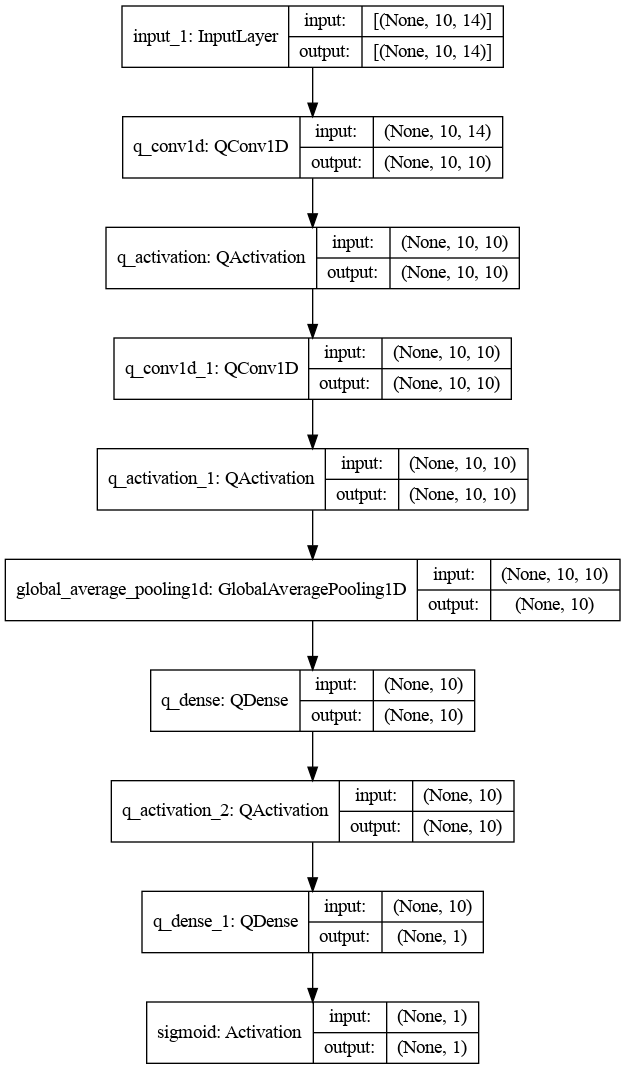

In [10]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [11]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
print("-----------------------------------")
#plotting.print_dict(config)
#print("-----------------------------------")

WARN: Unable to import optimizer(s) from expr_templates.py: No module named 'sympy'
Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_den

/home/rmarroqu/packages/hls4ml/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


In [12]:
config['LayerName']['q_conv1d']['ReuseFactor'] = 2
config['LayerName']['q_conv1d_1']['ReuseFactor'] = 2
config["LayerName"]["q_conv1d"]["ConvImplementation"] = "Pointwise"
config["LayerName"]["q_conv1d_1"]["ConvImplementation"] = "Pointwise"
config["LayerName"]["input_1"]["Precision"] = "fixed<10,3>"

In [13]:
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='qkmodel_1/hls4ml_prj',
                                                       part='xcu250-figd2104-2L-e')

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_dense_1, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Layer 

In [14]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file="model_summary.png")

In [15]:
hls_model.compile()

Writing HLS project
Done


In [16]:
hls_model.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /data/therwig/Xilinx/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/data/therwig/Xilinx/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'rmarroqu' on host 'correlator4.fnal.gov' (Linux_x86_64 version 3.10.0-1160.102.1.el7.x86_64) on Wed Nov 15 18:35:59 CST 2023
INFO: [HLS 200-10] On os "Scientific Linux release 7.9 (Nitrogen)"
INFO: [HLS 200-10] In directory '/home/rmarroqu/L1JetTagDaniel/hls4mlModifications/10-08-23/qkmodel_1/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/rmarroqu/L1JetTagDaniel/hls4mlModifications/10-08-23/qkmodel_1/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.114',
  'BestLatency': '12',
  'WorstLatency': '12',
  'IntervalMin': '2',
  'IntervalMax': '2',
  'BRAM_18K': '79',
  'DSP': '0',
  'FF': '5627',
  'LUT': '27166',
  'URAM': '0',
  'AvailableBRAM_18K': '5376',
  'AvailableDSP': '12288',
  'AvailableFF': '3456000',
  'AvailableLUT': '1728000',
  'AvailableURAM': '1280'}}

In [17]:
hls4ml.report.read_vivado_report('qkmodel_1/hls4ml_prj/')

Found 1 solution(s) in qkmodel_1/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Wed Nov 15 18:38:15 2023

* Version:        2019.2 (Build 2704478 on Wed Nov 06 22:10:23 MST 2019)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing: 
    * Summary: 
    +--------+---------+----------+------------+
    |  Clock |  Target | Estimated| Uncertainty|
    +--------+---------+----------+------------+
    |ap_clk  | 5.00 ns | 4.114 ns |   0.62 ns  |
    +--------+---------+----------+------------+

+ Latency: 
    * Summary: 
    +---------+---------+-----------+-----------+-----+-----+----------+
    |  Latency (cycles) |   Latency (absolute)  |  Interval | Pipeline |
    |   min   |   max   |    min    |    max    | min | max |   Type   |
    +---------+---------+-